#Neural Network A Simple Perception

##Theoritical Questions

###1. What is deep learning, and how is it connected to artificial intelligence

Deep learning is a branch of AI, which mimics human brain to identify complex patterns from data using artificial neural networks


###2. What is a neural network, and what are the different types of neural networks

A computation system like human brain.
It is made of layers of connected nodes (neurons) having wights & biases.
Layers can be input layer, output layer , hidden layer

Artifical neural network (ANN)
Convolutional neural Network (CNN) - For Image data
Recurrent Neural network (RNN) - For sequential data like text, audio
GAN - Genration of data

###3. What is the mathematical structure of a neural network

Z = W.X + b

W - Weight
X - Feature
b - Bias vector
Z - Output before activation

Activation function is applied on the output

A = f(Z)


###4. What is an activation function, and why is it essential in neural network

Activation function introduces non linearity in the model to learn complex patterns.

- Enables non linearity
- Helps to learn complex patterns
- Activates the neurons
- Improve training stability


###5. Could you list some common activation functions used in neural networks

 - Linear
 - Sigmoid
 - tanh
 - ReLU
 - leaky ReLU
 - ELU
 - Softmax


###6. What is a multilayer neural network

Multi layer neural network, the network consists of multiple hidden layers. It can learn complex patterns from the data.


###7. What is a loss function, and why is it crucial for neural network training

Loss function measures the difference between actual result & predicted result.It quantifies the error of a model.

It is crucial because
  - Calculates model performance
  - Quantifies error
  - Enables weight, bias update through back propagation
  - prevents overfitting, underfitting


###8. What are some common types of loss functions

 - Regression problem
  - MSE
  - MAE
  - Huber loss

 - Classification problem
  - Binary cross entopy - Binary classification problem
  - Categorical cross entropy - Multi class classification problem
  - Hinge loss


###9. How does a neural network learn

Neural network learns in few steps
  - Forward propagation - Predicts the result with initial weight & biases
  - Loss - Loss is calculated based on the actual & predicted ouput
  - Backward propagation - weights & biases are updated based on the loss

The process is repeated to improve

###10. What is an optimizer in neural networks, and why is it necessary

Optimizers update the wights & biases to minimize the loss function.
 - Improves learning
 - Enhances convergence speed
 - prevents overfitting/ underfitting


###11. Could you briefly describe some common optimizers

  - Gradient descent - Updates after the entire epoch
  - Stochastic gradient Descent (SGD) - Updates for each data point
  - Mini batch gradinet descent - Updates weight after each batch
  - Momentum based optimizer - Gives more weightage to the recent data
  - Adagrad - Makes the learning rate dynamic
  - Adam

###12. Can you explain forward and backward propagation in a neural network

Forward propagation is the process where inputs pass through the network layer by layer to produce an output
Backward propagation is used to adjust the network's weights based on the prediction error

###13. What is weight initialization, and how does it impact training

Weight initialization is the process of setting the starting values of a neural network's weights before training begins.

  - Speed up convergence
  - Minimizes vanishing gradient problem

###14. What is the vanishing gradient problem in deep learning

The vanishing gradient problem occurs when gradients become too small during backpropagation, preventing earlier layers from learning effectively. This leads to slow training.

###15. What is the exploding gradient problem?

If weight values are too large, gradients can grow exponentially during back propagetion, causing issue in convergence

##Practical Questions

In [6]:
###1. How do you create a simple perceptron for basic binary classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')


import numpy as np

class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction

                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

X = np.array([[0,0], [0,1], [1,0], [1,1]])  # Binary inputs
y = np.array([0, 0, 0, 1])  # AND operation as labels

perceptron = Perceptron(num_features=2)
perceptron.train(X, y)

for sample in X:
    print(f"Input: {sample}, Prediction: {perceptron.predict(sample)}")


Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy 0.855
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


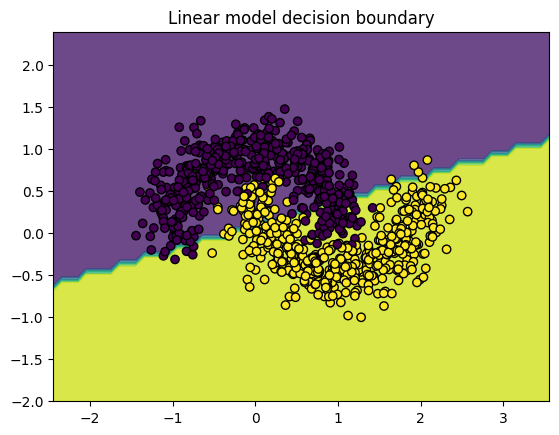

In [16]:
###2. How can you build a neural network with one hidden layer using Keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = Sequential([
    Dense(4,activation='linear',input_dim=2),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=50,batch_size=20,verbose=0)

y_pred = (model.predict(X_test)>0.5).astype(int)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = (Z > 0.5).astype(int).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor="k")
plt.title("Linear model decision boundary")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy 0.855
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


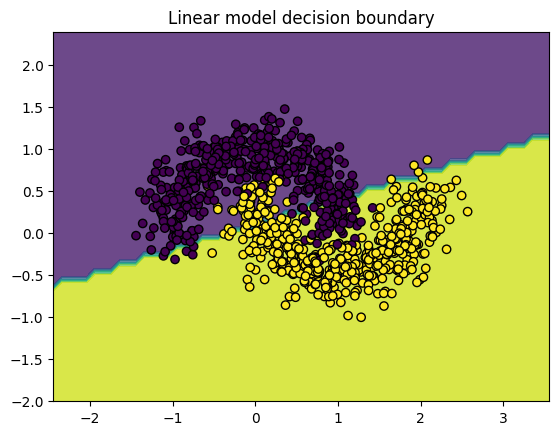

In [18]:
 ###3. How do you initialize weights using the Xavier (Glorot) initialization method in Keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform,GlorotNormal

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = Sequential([
    Dense(4,activation='linear',input_dim=2,kernel_initializer=GlorotNormal()),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform())
])
model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=50,batch_size=20,verbose=0)

y_pred = (model.predict(X_test)>0.5).astype(int)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = (Z > 0.5).astype(int).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor="k")
plt.title("Linear model decision boundary")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy 0.965
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


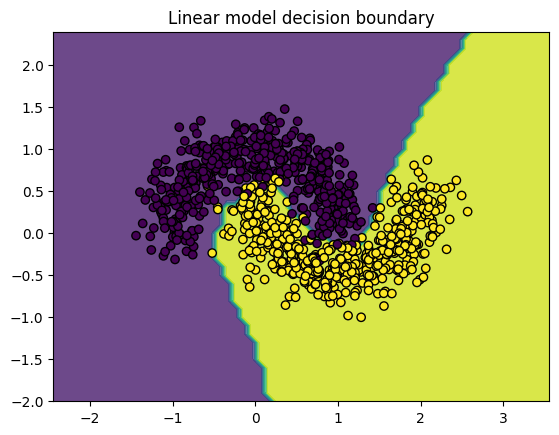

In [19]:
###4. How can you apply different activation functions in a neural network in Keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform,GlorotNormal

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = Sequential([
    Dense(4,activation='linear',input_dim=2,kernel_initializer=GlorotNormal()),
    Dense(6,activation='relu',kernel_initializer=GlorotNormal()),
    Dense(8,activation='tanh',kernel_initializer=GlorotNormal()),
    Dense(8,activation='elu',kernel_initializer=GlorotNormal()),
    Dense(8,activation=LeakyReLU(alpha=0.01),kernel_initializer=GlorotNormal()),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform())
])
model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=50,batch_size=20,verbose=0)

y_pred = (model.predict(X_test)>0.5).astype(int)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = (Z > 0.5).astype(int).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor="k")
plt.title("Linear model decision boundary")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy 0.97
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


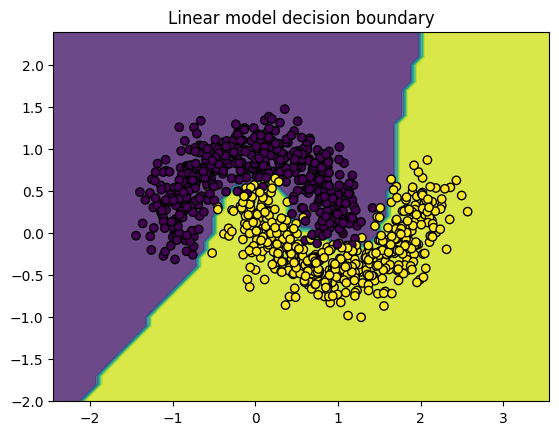

In [21]:
###5. How do you add dropout to a neural network model to prevent overfitting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform,GlorotNormal

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = Sequential([
    Dense(4,activation='linear',input_dim=2,kernel_initializer=GlorotNormal()),
    Dropout(0.1),
    Dense(6,activation='relu',kernel_initializer=GlorotNormal()),
    Dense(8,activation='tanh',kernel_initializer=GlorotNormal()),
    Dense(8,activation='elu',kernel_initializer=GlorotNormal()),
    Dense(8,activation=LeakyReLU(alpha=0.01),kernel_initializer=GlorotNormal()),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform())
])
model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=50,batch_size=20,verbose=0)

y_pred = (model.predict(X_test)>0.5).astype(int)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = (Z > 0.5).astype(int).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor="k")
plt.title("Linear model decision boundary")
plt.show()

In [39]:
###6. How do you manually implement forward propagation in a simple neural network

import numpy as np

# Activation function (ReLU for hidden, Sigmoid for output)
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize input (2 features)
X = np.array([[0.5, 0.2]])  # Shape (1,2)

# Initialize weights and biases
W1 = np.array([[0.3, 0.7], [0.6, 0.5]])  # Shape (2,2)
b1 = np.array([[0.1, 0.2]])               # Shape (1,2)

W2 = np.array([[0.8], [0.4]])             # Shape (2,1)
b2 = np.array([[0.3]])                    # Shape (1,1)

# Forward propagation: Hidden Layer
Z1 = np.dot(X, W1) + b1
A1 = relu(Z1)

# Forward propagation: Output Layer
Z2 = np.dot(A1, W2) + b2
A2 = sigmoid(Z2)  # Final prediction

print(f"Output: {A2}")


Output: [[0.70182426]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Accuracy 0.975
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


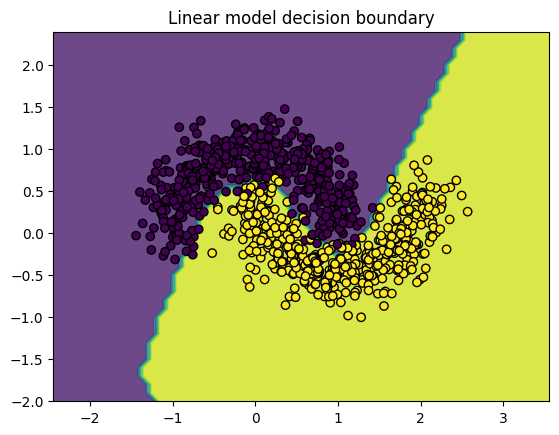

In [23]:
###7. How do you add batch normalization to a neural network model in Keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform,GlorotNormal

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = Sequential([
    Dense(4,activation='linear',input_dim=2,kernel_initializer=GlorotNormal()),
    Dropout(0.1),
    BatchNormalization(),
    Dense(6,activation='relu',kernel_initializer=GlorotNormal()),
    BatchNormalization(),
    Dense(8,activation='tanh',kernel_initializer=GlorotNormal()),
    BatchNormalization(),
    Dense(8,activation='elu',kernel_initializer=GlorotNormal()),
    BatchNormalization(),
    Dense(8,activation=LeakyReLU(alpha=0.01),kernel_initializer=GlorotNormal()),
    BatchNormalization(),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform())
])
model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=50,batch_size=20,verbose=0)

y_pred = (model.predict(X_test)>0.5).astype(int)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = (Z > 0.5).astype(int).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolor="k")
plt.title("Linear model decision boundary")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Accuracy 0.98


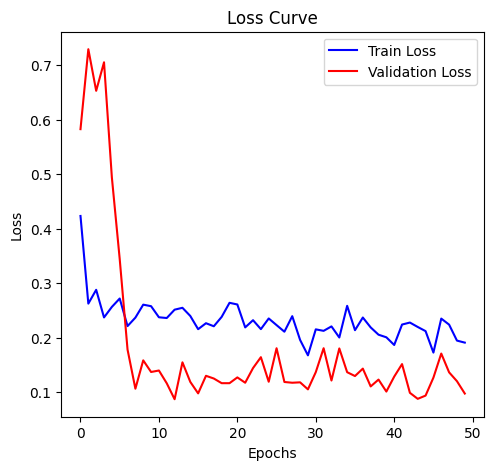

In [38]:
###8. How can you visualize the training process with accuracy and loss curves

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform,GlorotNormal

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = Sequential([
    Dense(4,activation='linear',input_dim=2,kernel_initializer=GlorotNormal()),
    Dropout(0.1),
    BatchNormalization(),
    Dense(6,activation='relu',kernel_initializer=GlorotNormal()),
    BatchNormalization(),
    Dense(8,activation='tanh',kernel_initializer=GlorotNormal()),
    BatchNormalization(),
    Dense(8,activation='elu',kernel_initializer=GlorotNormal()),
    BatchNormalization(),
    Dense(8,activation=LeakyReLU(alpha=0.01),kernel_initializer=GlorotNormal()),
    BatchNormalization(),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform())
])
model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='binary_crossentropy')
history = model.fit(X_train,y_train,epochs=50,batch_size=20,verbose=0, validation_data=(X_test, y_test))

y_pred = (model.predict(X_test)>0.5).astype(int)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

In [36]:
###9. How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform,GlorotNormal
from tensorflow.keras.losses import Loss
import tensorflow.keras.backend as k

class CustomLoss(Loss):
  def call(self,y_true,y_pred):
    return k.mean(k.square(y_true-y_pred))

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = Sequential([
    Dense(4,activation='linear',input_dim=2,kernel_initializer=GlorotNormal()),
    Dropout(0.1),
    Dense(6,activation='relu',kernel_initializer=GlorotNormal()),
    Dense(8,activation='tanh',kernel_initializer=GlorotNormal()),
    Dense(8,activation='elu',kernel_initializer=GlorotNormal()),
    Dense(8,activation=LeakyReLU(alpha=0.01),kernel_initializer=GlorotNormal()),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform())
])
optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
model.compile(optimizer=optimizer,metrics=['accuracy'],loss=CustomLoss())
model.fit(X_train,y_train,epochs=50,batch_size=20,verbose=0)

y_pred = (model.predict(X_test)>0.5).astype(int)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")
print(model.summary())


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy 0.745


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755 (2.95 KB)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 504 (1.97 KB)

None


In [35]:
###10. How can you create a custom loss function in Keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform,GlorotNormal
from tensorflow.keras.losses import Loss
import tensorflow.keras.backend as k

class CustomLoss(Loss):
  def call(self,y_true,y_pred):
    return k.mean(k.square(y_true-y_pred))

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = Sequential([
    Dense(4,activation='linear',input_dim=2,kernel_initializer=GlorotNormal()),
    Dropout(0.1),
    Dense(6,activation='relu',kernel_initializer=GlorotNormal()),
    Dense(8,activation='tanh',kernel_initializer=GlorotNormal()),
    Dense(8,activation='elu',kernel_initializer=GlorotNormal()),
    Dense(8,activation=LeakyReLU(alpha=0.01),kernel_initializer=GlorotNormal()),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform())
])
model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss=CustomLoss())
model.fit(X_train,y_train,epochs=50,batch_size=20,verbose=0)

y_pred = (model.predict(X_test)>0.5).astype(int)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")
print(model.summary())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy 0.845


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755 (2.95 KB)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 504 (1.97 KB)

None


In [28]:
###11. How can you visualize the structure of a neural network model in Keras?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform,GlorotNormal

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')


X,y = make_moons(n_samples=1000,noise=0.2,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


model = Sequential([
    Dense(4,activation='linear',input_dim=2,kernel_initializer=GlorotNormal()),
    Dropout(0.1),
    Dense(6,activation='relu',kernel_initializer=GlorotNormal()),
    Dense(8,activation='tanh',kernel_initializer=GlorotNormal()),
    Dense(8,activation='elu',kernel_initializer=GlorotNormal()),
    Dense(8,activation=LeakyReLU(alpha=0.01),kernel_initializer=GlorotNormal()),
    Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform())
])
model.compile(optimizer=Adam(learning_rate=0.01),metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=50,batch_size=20,verbose=0)

y_pred = (model.predict(X_test)>0.5).astype(int)

print(f"Accuracy {accuracy_score(y_test,y_pred)}")
print(model.summary())

from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy 0.95


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755 (2.95 KB)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 504 (1.97 KB)

None


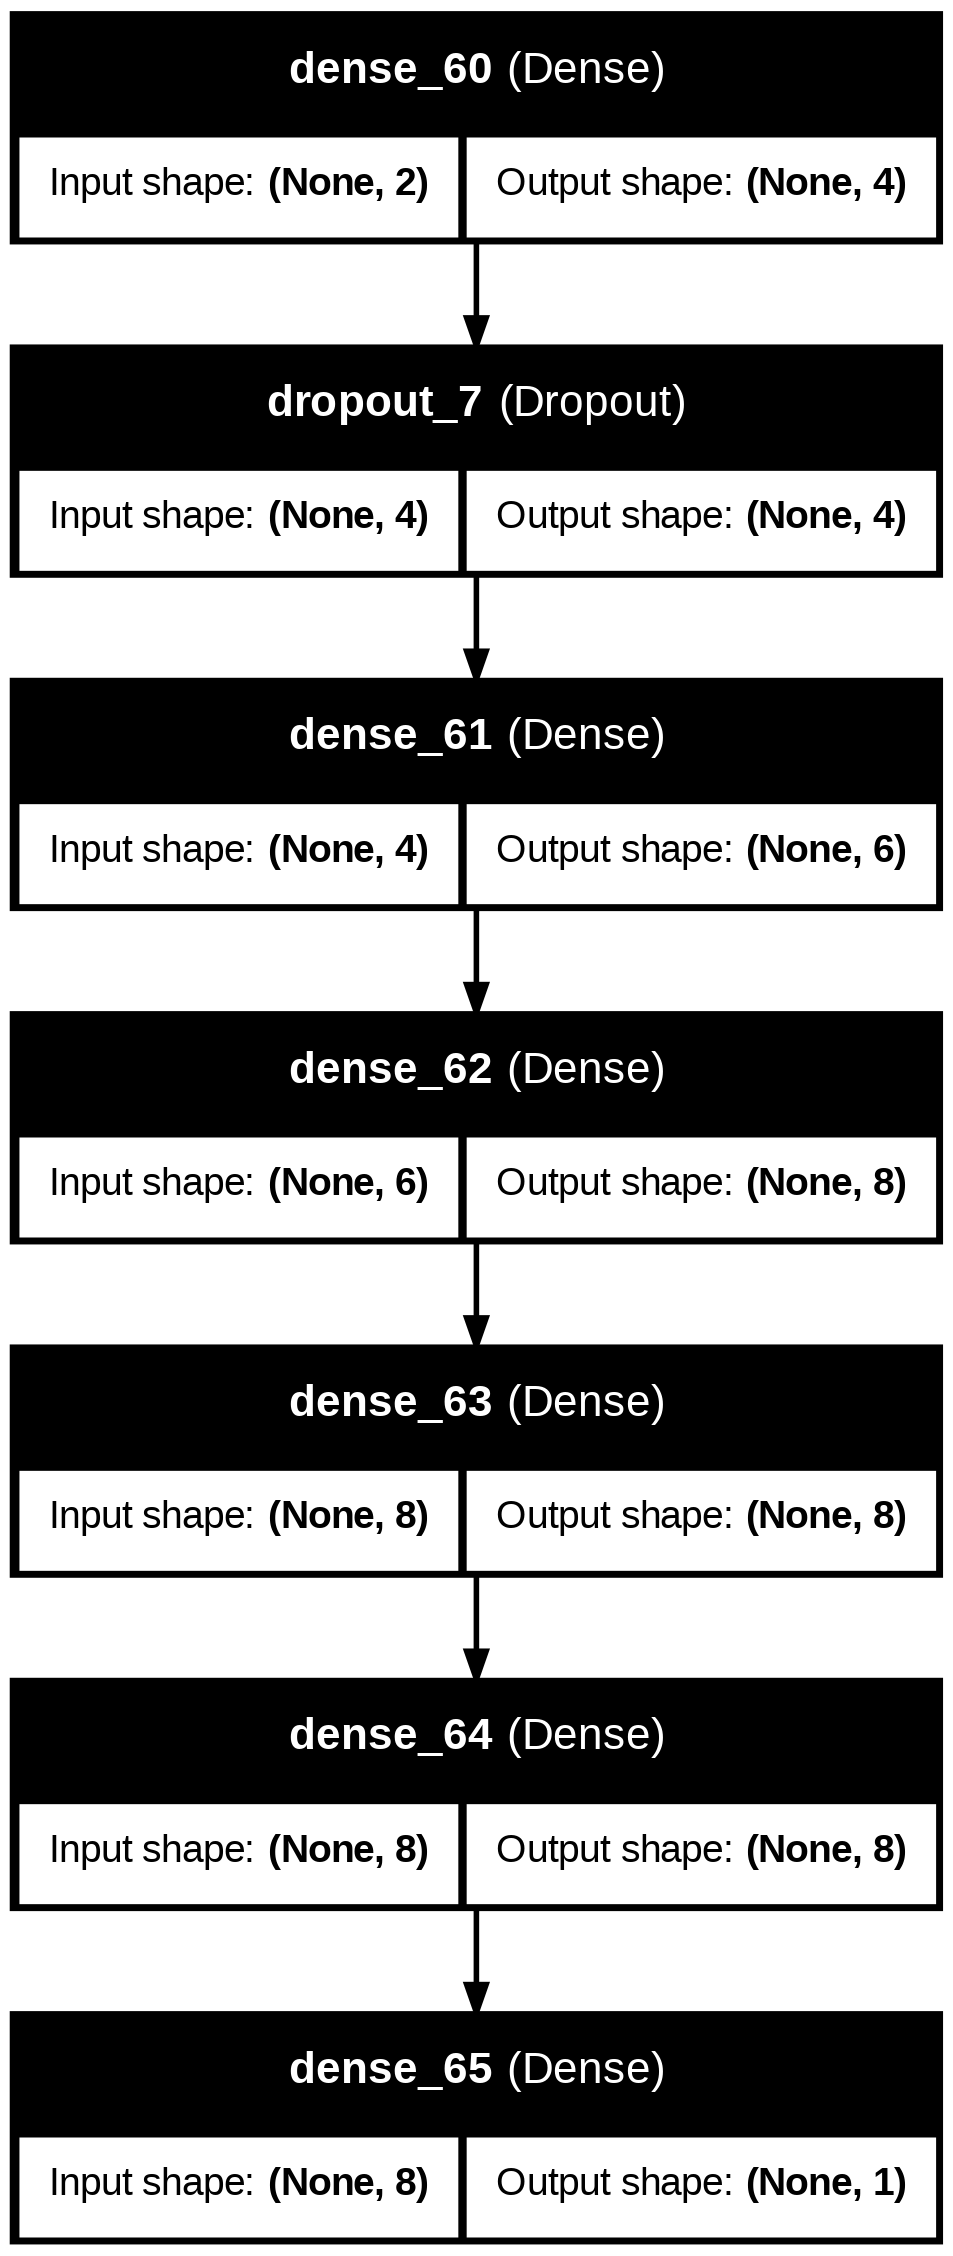

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model_structure.png", show_shapes=True, show_layer_names=True)

In [30]:
!tensorboard --logdir=./logs

2025-05-09 15:33:05.295138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746804785.342217   32525 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746804785.356426   32525 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-09 15:33:12.953917: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, u